In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
births = pd.read_csv("births.csv")
births['day'].fillna(0, inplace=True) 
births['day'] = births['day'].astype(int)

In [3]:
type(births['day'])

pandas.core.series.Series

In [4]:
births.head(10)

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548
5,1969,1,3,M,4994
6,1969,1,4,F,4440
7,1969,1,4,M,4520
8,1969,1,5,F,4192
9,1969,1,5,M,4198


In [5]:
births['decade'] = 10 * (births['year'] // 10)

In [6]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


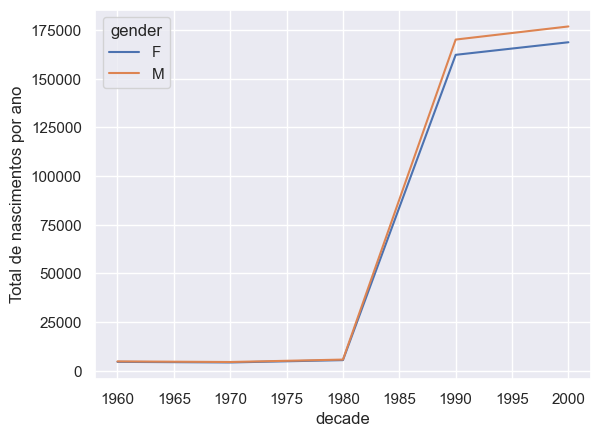

In [7]:
sns.set()
births_decade = births.pivot_table('births', index='decade', columns='gender')
births_decade.plot()
plt.ylabel('Total de nascimentos por ano')
plt.show()

In [8]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [9]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

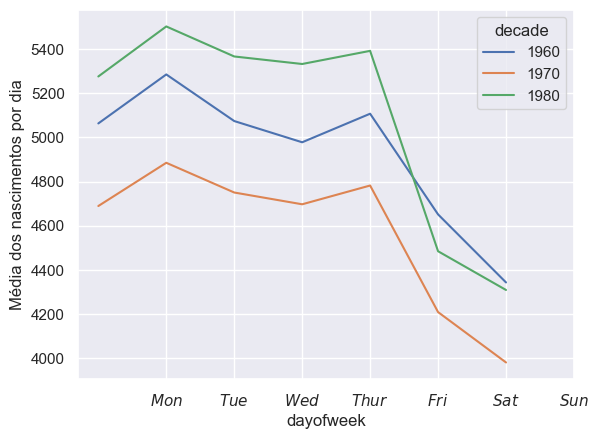

In [10]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticks([1, 2, 3, 4, 5, 6, 7])
plt.gca().set_xticklabels(['$Mon$', '$Tue$', '$Wed$', '$Thur$', '$Fri$', '$Sat$', '$Sun$']) 
plt.ylabel('Média dos nascimentos por dia')
plt.show()

In [16]:
births_month = births.pivot_table('births', [births.index.month, births.index.day])
births_month.head()
births_month.index = [pd.datetime(2012, month, day) for (month, day) in births_month.index]
births_month.head()


C:\Users\Lucas\AppData\Local\Temp\ipykernel_2636\880031319.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_month.index = [pd.datetime(2012, month, day) for (month, day) in births_month.index]


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


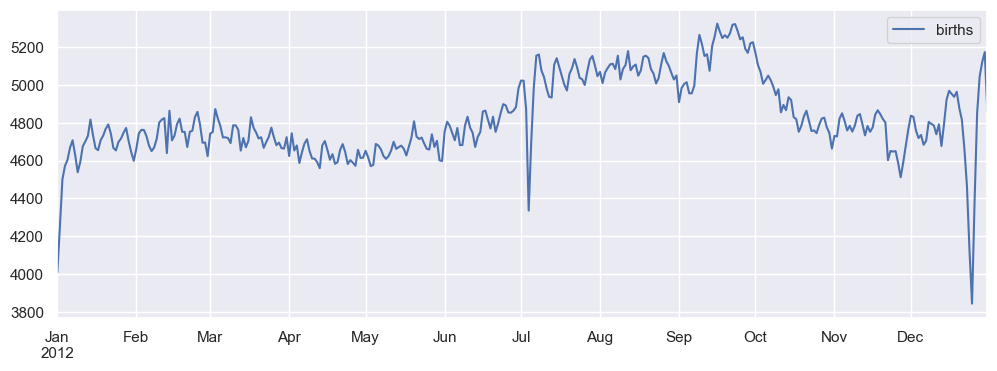

In [18]:
fig, ax = plt.subplots(figsize=(12,4))
births_month.plot(ax=ax)
plt.show()